# STATISTICS MODELS

In [ ]:
############ UPLOAD THE DATASET #################
# Reding the co2 dataset
import numpy as np
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

data_url = 'https://raw.githubusercontent.com/puldavid87/Timeseries/main/dataset/sensor_data_hourly.csv'
df= pd.read_csv(data_url, index_col='Time',parse_dates=True, sep=',')
#https://otexts.com/fpp2/estimation-and-model-selection.html


In [ ]:

df.index

DatetimeIndex(['2022-04-12 11:00:00', '2022-04-12 12:00:00',
               '2022-04-12 13:00:00', '2022-04-12 14:00:00',
               '2022-04-12 15:00:00', '2022-04-12 16:00:00',
               '2022-04-12 17:00:00', '2022-04-12 18:00:00',
               '2022-04-12 19:00:00', '2022-04-12 20:00:00',
               ...
               '2022-08-29 14:00:00', '2022-08-29 15:00:00',
               '2022-08-29 16:00:00', '2022-08-29 17:00:00',
               '2022-08-29 18:00:00', '2022-08-29 19:00:00',
               '2022-08-29 20:00:00', '2022-08-29 21:00:00',
               '2022-08-29 22:00:00', '2022-08-29 23:00:00'],
              dtype='datetime64[ns]', name='Time', length=3349, freq=None)

## Setting a DatetimeIndex Frequency
Note that our DatetimeIndex does not have a frequency. In order to build a Holt-Winters smoothing model, statsmodels needs to know the frequency of the data (whether it's daily, monthly etc.). Since observations occur at the start of each month, we'll use MS.<br>A full list of time series offset aliases can be found <a href='http://pandas.pydata.org/pandas-docs/stable/user_guide/timeseries.html#offset-aliases'>here</a>.

In [ ]:
df.index.freq = 'H'
df.index

DatetimeIndex(['2022-04-12 11:00:00', '2022-04-12 12:00:00',
               '2022-04-12 13:00:00', '2022-04-12 14:00:00',
               '2022-04-12 15:00:00', '2022-04-12 16:00:00',
               '2022-04-12 17:00:00', '2022-04-12 18:00:00',
               '2022-04-12 19:00:00', '2022-04-12 20:00:00',
               ...
               '2022-08-29 14:00:00', '2022-08-29 15:00:00',
               '2022-08-29 16:00:00', '2022-08-29 17:00:00',
               '2022-08-29 18:00:00', '2022-08-29 19:00:00',
               '2022-08-29 20:00:00', '2022-08-29 21:00:00',
               '2022-08-29 22:00:00', '2022-08-29 23:00:00'],
              dtype='datetime64[ns]', name='Time', length=3349, freq='H')

## Holt-Winters Methods
In the previous section on <strong>Exponentially Weighted Moving Averages</strong> (EWMA) we applied <em>Simple Exponential Smoothing</em> using just one smoothing factor $\alpha$ (alpha). This failed to account for other contributing factors like trend and seasonality.

In this section we'll look at <em>Double</em> and <em>Triple Exponential Smoothing</em> with the <a href='https://otexts.com/fpp2/holt-winters.html'>Holt-Winters Methods</a>. 

In <strong>Double Exponential Smoothing</strong> (aka Holt's Method) we introduce a new smoothing factor $\beta$ (beta) that addresses trend:

\begin{split}l_t &= (1 - \alpha) l_{t-1} + \alpha x_t, & \text{    level}\\
b_t &= (1-\beta)b_{t-1} + \beta(l_t-l_{t-1}) & \text{    trend}\\
y_t &= l_t + b_t & \text{    fitted model}\\
\hat y_{t+h} &= l_t + hb_t & \text{    forecasting model (} h = \text{# periods into the future)}\end{split}

Because we haven't yet considered seasonal fluctuations, the forecasting model is simply a straight sloped line extending from the most recent data point. We'll see an example of this in upcoming lectures.

With <strong>Triple Exponential Smoothing</strong> (aka the Holt-Winters Method) we introduce a smoothing factor $\gamma$ (gamma) that addresses seasonality:

\begin{split}l_t &= (1 - \alpha) l_{t-1} + \alpha x_t, & \text{    level}\\
b_t &= (1-\beta)b_{t-1} + \beta(l_t-l_{t-1}) & \text{    trend}\\
c_t &= (1-\gamma)c_{t-L} + \gamma(x_t-l_{t-1}-b_{t-1}) & \text{    seasonal}\\
y_t &= (l_t + b_t) c_t & \text{    fitted model}\\
\hat y_{t+m} &= (l_t + mb_t)c_{t-L+1+(m-1)modL} & \text{    forecasting model (} m = \text{# periods into the future)}\end{split}

Here $L$ represents the number of divisions per cycle. In our case looking at monthly data that displays a repeating pattern each year, we would use $L=12$.

In general, higher values for $\alpha$, $\beta$ and $\gamma$ (values closer to 1), place more emphasis on recent data.

<div class="alert alert-info"><h3>Related Functions:</h3>
<tt><strong><a href='https://www.statsmodels.org/stable/generated/statsmodels.tsa.holtwinters.SimpleExpSmoothing.html'>statsmodels.tsa.holtwinters.SimpleExpSmoothing</a></strong><font color=black>(endog)</font>&nbsp;&nbsp;&nbsp;&nbsp;
Simple Exponential Smoothing<br>
<strong><a href='https://www.statsmodels.org/stable/generated/statsmodels.tsa.holtwinters.ExponentialSmoothing.html'>statsmodels.tsa.holtwinters.ExponentialSmoothing</a></strong><font color=black>(endog)</font>&nbsp;&nbsp;
    Holt-Winters Exponential Smoothing</tt>
    
<h3>For Further Reading:</h3>
<tt>
<strong>
<a href='https://www.itl.nist.gov/div898/handbook/pmc/section4/pmc43.htm'>NIST/SEMATECH e-Handbook of Statistical Methods</a></strong>&nbsp;&nbsp;<font color=black>What is Exponential Smoothing?</font></tt></div>

## Split the dataset

In [ ]:
df=df.interpolate(method='linear')


In [ ]:
train_data= df.iloc[6:3100]
test_data = df.iloc[3100:3196] #3373
train_data

,CO2,TEMP,HUM
Time,,,
2022-04-12 17:00:00,445.103448,14.448276,28.362069
2022-04-12 18:00:00,458.321429,19.125000,23.410714
2022-04-12 19:00:00,459.035714,20.482143,21.928571
2022-04-12 20:00:00,453.827586,19.862069,22.293103
2022-04-12 21:00:00,457.857143,19.571429,22.839286
...,...,...,...
2022-08-19 10:00:00,553.392857,22.607143,55.928571
2022-08-19 11:00:00,551.607143,23.910714,55.125000
2022-08-19 12:00:00,544.172414,23.879310,56.413793


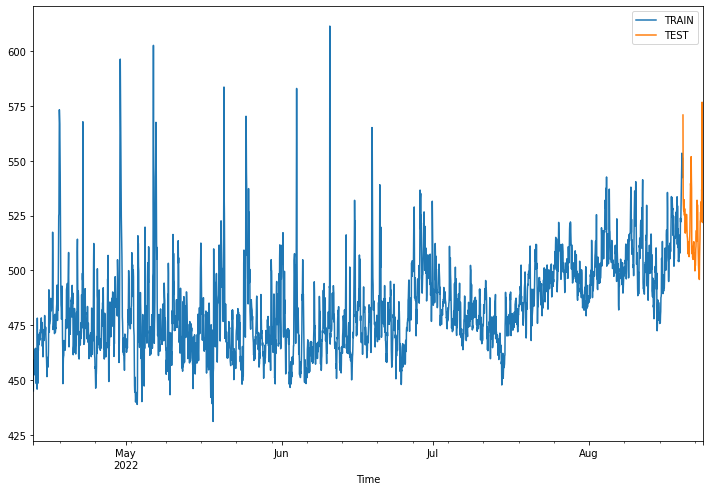

In [ ]:
train_data['CO2'].plot(legend=True,label='TRAIN')
test_data['CO2'].plot(legend=True,label='TEST',figsize=(12,8))

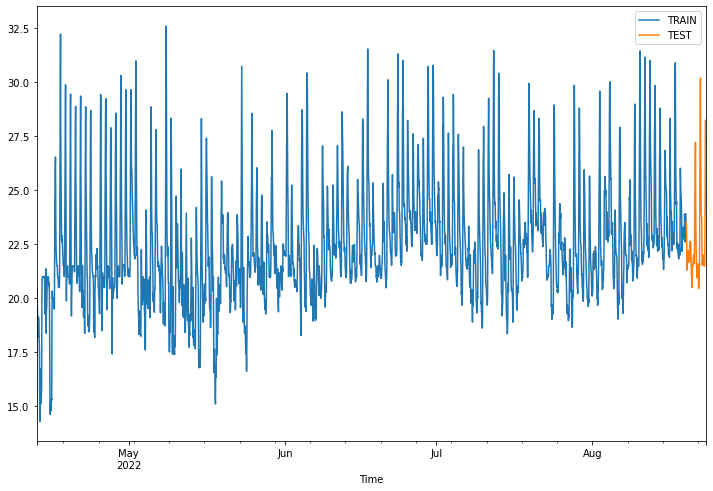

In [ ]:
train_data['TEMP'].plot(legend=True,label='TRAIN')
test_data['TEMP'].plot(legend=True,label='TEST',figsize=(12,8))

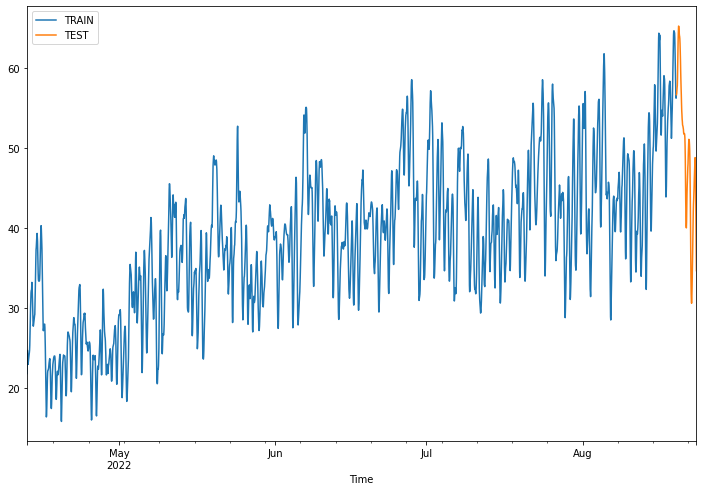

In [ ]:
train_data['HUM'].plot(legend=True,label='TRAIN')
test_data['HUM'].plot(legend=True,label='TEST',figsize=(12,8))

## Double Exponential Smoothing
Where Simple Exponential Smoothing employs just one smoothing factor $\alpha$ (alpha), Double Exponential Smoothing adds a second smoothing factor $\beta$ (beta) that addresses trends in the data. Like the alpha factor, values for the beta factor fall between zero and one ($0<\beta≤1$). The benefit here is that the model can anticipate future increases or decreases where the level model would only work from recent calculations.

We can also address different types of change (growth/decay) in the trend. If a time series displays a straight-line sloped trend, you would use an <strong>additive</strong> adjustment. If the time series displays an exponential (curved) trend, you would use a <strong>multiplicative</strong> adjustment.

As we move toward forecasting, it's worth noting that both additive and multiplicative adjustments may become exaggerated over time, and require <em>damping</em> that reduces the size of the trend over future periods until it reaches a flat line.

In [ ]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing

es2_co2model = ExponentialSmoothing(train_data['CO2'], trend='add').fit()
es2_tempmodel= ExponentialSmoothing(train_data['TEMP'], trend='add').fit()
es2_humodel = ExponentialSmoothing(train_data['HUM'], trend='add').fit()

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters/model.py:429: FutureWarning: After 0.13 initialization must be handled at model creation
  FutureWarning,


In [ ]:
co2_es2_predictions=es2_co2model.forecast(96)
temp_es2_predictions=es2_tempmodel.forecast(96)
hum_es2_predictions=es2_humodel.forecast(96)
co2_es2_predictions

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:132: FutureWarning: The 'freq' argument in Timestamp is deprecated and will be removed in a future version.
  date_key = Timestamp(key, freq=base_index.freq)


2022-08-02 23:00:00    500.401379
2022-08-03 00:00:00    501.750365
2022-08-03 01:00:00    503.099351
2022-08-03 02:00:00    504.448337
2022-08-03 03:00:00    505.797323
                          ...    
2022-08-06 18:00:00    623.159098
2022-08-06 19:00:00    624.508084
2022-08-06 20:00:00    625.857070
2022-08-06 21:00:00    627.206056
2022-08-06 22:00:00    628.555042
Freq: H, Length: 96, dtype: float64

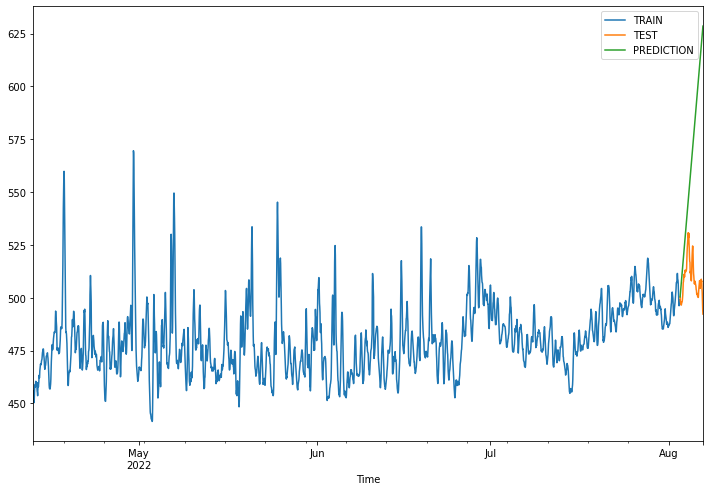

In [ ]:
train_data['CO2'].plot(legend=True,label='TRAIN')
test_data['CO2'].plot(legend=True,label='TEST',figsize=(12,8))
co2_es2_predictions.plot(legend=True,label='PREDICTION')

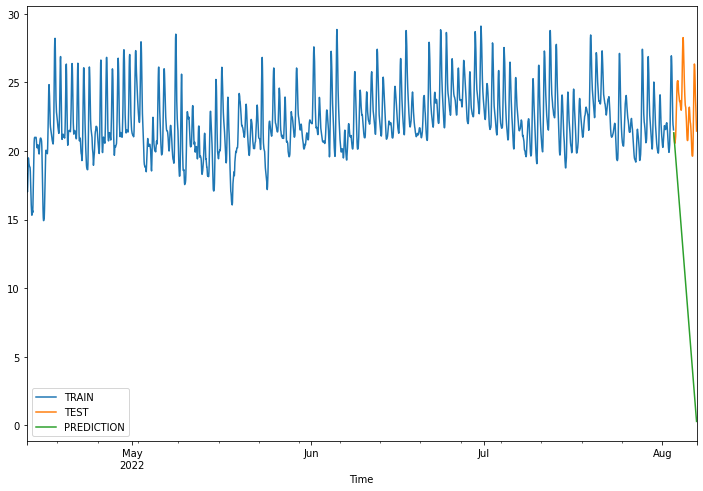

In [ ]:
train_data['TEMP'].plot(legend=True,label='TRAIN')
test_data['TEMP'].plot(legend=True,label='TEST',figsize=(12,8))
temp_es2_predictions.plot(legend=True,label='PREDICTION')

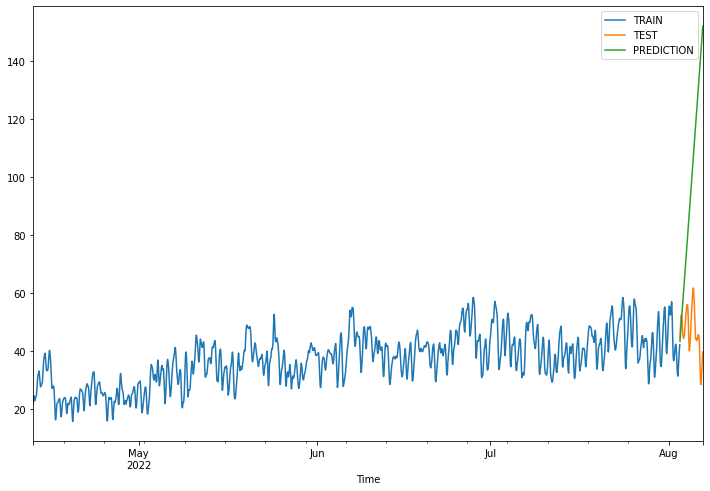

In [ ]:
train_data['HUM'].plot(legend=True,label='TRAIN')
test_data['HUM'].plot(legend=True,label='TEST',figsize=(12,8))
hum_es2_predictions.plot(legend=True,label='PREDICTION')

## Triple Exponential Smoothing
Triple Exponential Smoothing, the method most closely associated with Holt-Winters, adds support for both trends and seasonality in the data. 


In [ ]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing

es3_co2model = ExponentialSmoothing(train_data['CO2'], trend='add', seasonal='add',seasonal_periods=24).fit()
es3_tempmodel= ExponentialSmoothing(train_data['TEMP'], trend='add', seasonal='add',seasonal_periods=24).fit()
es3_humodel = ExponentialSmoothing(train_data['HUM'], trend='add', seasonal='add',seasonal_periods=24).fit()


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters/model.py:429: FutureWarning: After 0.13 initialization must be handled at model creation
  FutureWarning,


In [ ]:
co2_es3_predictions=es3_co2model.forecast(96)
temp_es3_predictions=es3_tempmodel.forecast(96)
hum_es3_predictions=es3_humodel.forecast(96)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:132: FutureWarning: The 'freq' argument in Timestamp is deprecated and will be removed in a future version.
  date_key = Timestamp(key, freq=base_index.freq)


In [ ]:
print(co2_es3_predictions)

2022-08-02 23:00:00    500.920757
2022-08-03 00:00:00    502.314562
2022-08-03 01:00:00    503.916502
2022-08-03 02:00:00    505.327968
2022-08-03 03:00:00    506.128786
                          ...    
2022-08-06 18:00:00    555.109972
2022-08-06 19:00:00    554.697676
2022-08-06 20:00:00    554.476891
2022-08-06 21:00:00    554.872960
2022-08-06 22:00:00    556.221946
Freq: H, Length: 96, dtype: float64


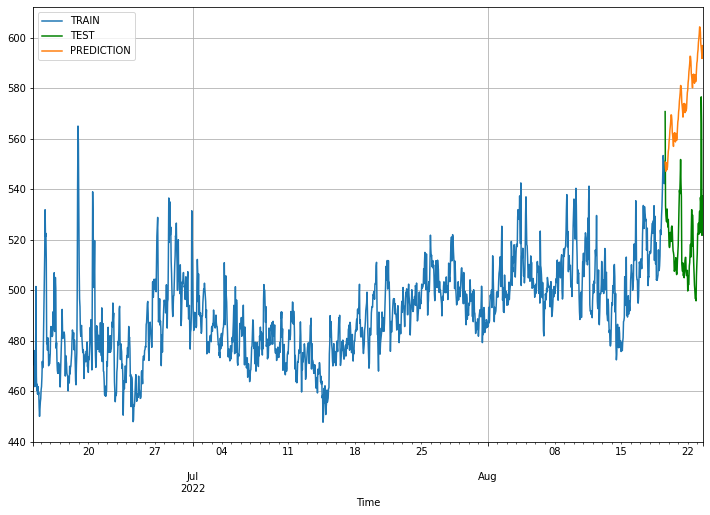

In [ ]:

train_data['CO2'].iloc[1500:].plot(legend=True,label='TRAIN', xlim=['2022-07-15','2022-08-03'])
test_data['CO2'].plot(legend=True,label='TEST',figsize=(12,8), c='green')
co2_es3_predictions.plot(legend=True,label='PREDICTION')
plt.grid()

In [ ]:
print(co2_es3_predictions)

2022-08-19 15:00:00    550.818405
2022-08-19 16:00:00    548.303001
2022-08-19 17:00:00    547.172453
2022-08-19 18:00:00    550.544462
2022-08-19 19:00:00    550.035736
                          ...    
2022-08-23 10:00:00    596.144212
2022-08-23 11:00:00    594.308506
2022-08-23 12:00:00    591.824613
2022-08-23 13:00:00    596.960465
2022-08-23 14:00:00    596.342491
Freq: H, Length: 96, dtype: float64


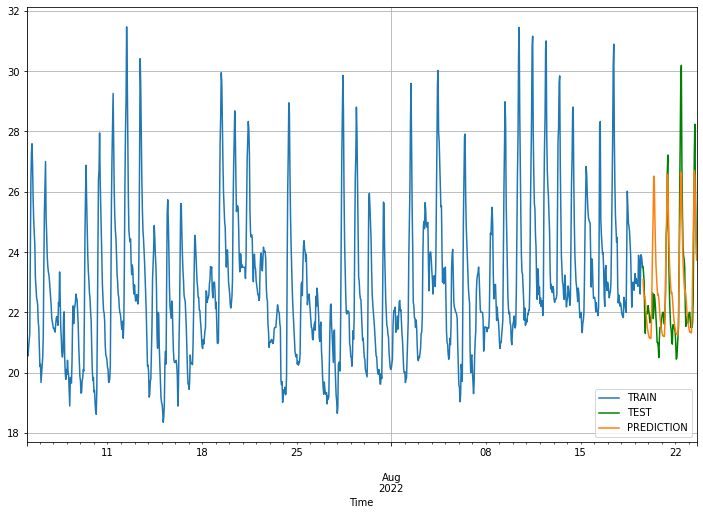

In [ ]:

train_data['TEMP'].iloc[2000:].plot(legend=True,label='TRAIN')
test_data['TEMP'].plot(legend=True,label='TEST',figsize=(12,8),c='green')
temp_es3_predictions.plot(legend=True,label='PREDICTION')
plt.grid()

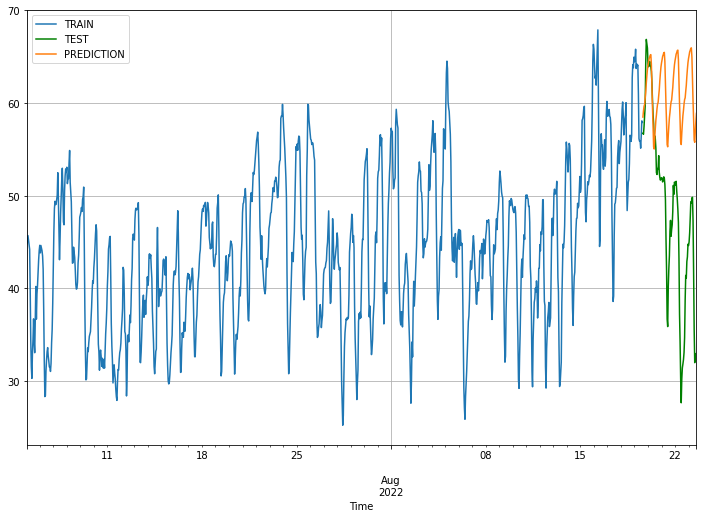

In [ ]:
train_data['HUM'].iloc[2000:].plot(legend=True,label='TRAIN')
test_data['HUM'].plot(legend=True,label='TEST',figsize=(12,8),c='green')
hum_es3_predictions.plot(legend=True,label='PREDICTION')
plt.grid()

In [ ]:
from statsmodels.tools.eval_measures import mse,rmse,rmspe,maxabs,meanabs
#co2
def mea_stats(y,y_hat):
  error1 = mse(y, y_hat)
  error2 = rmse(y, y_hat)
  error3 = rmspe(y, y_hat)
  error4 = maxabs(y, y_hat)
  error5 = meanabs(y, y_hat)
  print(f' MSE Error: {error1:11.10}')
  print(f' RMSE Error: {error2:11.10}')
  print(f'Root Mean Squared Percentage Error:{error3:11.10}')
  print(f' maximum absolute error: {error4:11.10}')
  print(f' mean absolute Error: {error5:11.10}')

In [ ]:
mea_stats(test_data['CO2'],co2_es3_predictions)

 MSE Error: 3532.974562
 RMSE Error: 59.43883043
Root Mean Squared Percentage Error:1.156814402
 maximum absolute error: 88.09270707
 mean absolute Error: 56.30873699


In [ ]:
mea_stats(test_data['TEMP'],temp_es3_predictions)

 MSE Error: 1.632293118
 RMSE Error: 1.277612272
Root Mean Squared Percentage Error:0.551552701
 maximum absolute error: 4.517030919
 mean absolute Error: 0.9240966734


In [ ]:
mea_stats(test_data['HUM'],hum_es3_predictions)

 MSE Error: 235.7924737
 RMSE Error: 15.35553561
Root Mean Squared Percentage Error: 4.03271352
 maximum absolute error: 27.86259895
 mean absolute Error: 12.98986045


## # ACF and PACF
# Autocorrelation Function / Partial Autocorrelation Function
Before we can investigate <em>autoregression</em> as a modeling tool, we need to look at <em>covariance</em> and <em>correlation</em> as they relate to lagged (shifted) samples of a time series.


### Goals
 * Be able to create ACF and PACF charts
 * Create these charts for multiple times series, one with seasonality and another without
 * Be able to calculate Orders PQD terms for ARIMA off these charts (highlight where they cross the x axis)
 
<div class="alert alert-info"><h3>Related Functions:</h3>
<tt><strong>
<a href='https://www.statsmodels.org/stable/generated/statsmodels.tsa.stattools.acovf.html'>stattools.acovf</a></strong><font color=black>(x[, unbiased, demean, fft, …])</font>&nbsp;Autocovariance for 1D<br>
<strong><a href='https://www.statsmodels.org/stable/generated/statsmodels.tsa.stattools.acf.html'>stattools.acf</a></strong><font color=black>(x[, unbiased, nlags, qstat, …])</font>&nbsp;&nbsp;Autocorrelation function for 1d arrays<br>
<strong><a href='https://www.statsmodels.org/stable/generated/statsmodels.tsa.stattools.pacf.html'>stattools.pacf</a></strong><font color=black>(x[, nlags, method, alpha])</font>&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;Partial autocorrelation estimated<br>
<strong><a href='https://www.statsmodels.org/stable/generated/statsmodels.tsa.stattools.pacf_yw.html'>stattools.pacf_yw</a></strong><font color=black>(x[, nlags, method])</font>&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;Partial autocorrelation estimated with non-recursive yule_walker<br>
<strong><a href='https://www.statsmodels.org/stable/generated/statsmodels.tsa.stattools.pacf_ols.html'>stattools.pacf_ols</a></strong><font color=black>(x[, nlags])</font>&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;Calculate partial autocorrelations</tt>
   
<h3>Related Plot Methods:</h3>
<tt><strong>
<a href='https://www.statsmodels.org/stable/generated/statsmodels.graphics.tsaplots.plot_acf.html'>tsaplots.plot_acf</a></strong><font color=black>(x)</font>&nbsp;&nbsp;&nbsp;Plot the autocorrelation function<br>
<strong><a href='https://www.statsmodels.org/stable/generated/statsmodels.graphics.tsaplots.plot_pacf.html'>tsaplots.plot_pacf</a></strong><font color=black>(x)</font>&nbsp;&nbsp;Plot the partial autocorrelation function</tt>

<h3>For Further Reading:</h3>
<strong>
<a href='https://en.wikipedia.org/wiki/Autocovariance'>Wikipedia:</a></strong>&nbsp;&nbsp;<font color=black>Autocovariance</font><br>
<strong>
<a href='https://otexts.com/fpp2/autocorrelation.html'>Forecasting: Principles and Practice</a></strong>&nbsp;&nbsp;<font color=black>Autocorrelation</font><br>
<strong>
<a href='https://www.itl.nist.gov/div898/handbook/pmc/section4/pmc4463.htm'>NIST Statistics Handbook</a></strong>&nbsp;&nbsp;<font color=black>Partial Autocorrelation Plot</font></div>


In [ ]:
import statsmodels.api as sm

In [ ]:
# Import the models we'll be using in this section
from statsmodels.tsa.stattools import acovf,acf,pacf,pacf_yw,pacf_ols

Ignore harmless warnings
A quick note before we get started. Many of the models used in this and upcoming sections are likely to raise harmless warnings.
For instance, the unbiased partial autocorrelation pacf_yw() performed below may raise a RuntimeWarning: invalid value encountered in sqrt.
We don't really need to be concerned with this, and we can avoid it with the following code:

In [ ]:
import warnings
warnings.filterwarnings("ignore")

## Autocovariance for 1D
In a <em>deterministic</em> process, like $y=sin(x)$, we always know the value of $y$ for a given value of $x$. However, in a <em>stochastic</em> process there is always some randomness that prevents us from knowing the value of $y$. Instead, we analyze the past (or <em>lagged</em>) behavior of the system to derive a probabilistic estimate for $\hat{y}$.

One useful descriptor is <em>covariance</em>. When talking about dependent and independent $x$ and $y$ variables, covariance describes how the variance in $x$ relates to the variance in $y$. Here the size of the covariance isn't really important, as $x$ and $y$ may have very different scales. However, if the covariance is positive it means that $x$ and $y$ are changing in the same direction, and may be related.

With a time series, $x$ is a fixed interval. Here we want to look at the variance of $y_t$ against lagged or shifted values of $y_{t+k}$

For a stationary time series, the autocovariance function for $\gamma$ (gamma) is given as:

${\displaystyle {\gamma}_{XX}(t_{1},t_{2})=\operatorname {Cov} \left[X_{t_{1}},X_{t_{2}}\right]=\operatorname {E} [(X_{t_{1}}-\mu _{t_{1}})(X_{t_{2}}-\mu _{t_{2}})]}$

We can calculate a specific $\gamma_k$ with:

${\displaystyle \gamma_k = \frac 1 n \sum\limits_{t=1}^{n-k} (y_t - \bar{y})(y_{t+k}-\bar{y})}$

## Autocorrelation for 1D
The correlation $\rho$ (rho) between two variables $y_1,y_2$ is given as:

### $\rho = \frac {\operatorname E[(y_1−\mu_1)(y_2−\mu_2)]} {\sigma_{1}\sigma_{2}} = \frac {\operatorname {Cov} (y_1,y_2)} {\sigma_{1}\sigma_{2}}$,

where $E$ is the expectation operator, $\mu_{1},\sigma_{1}$ and $\mu_{2},\sigma_{2}$ are the means and standard deviations of $y_1$ and $y_2$.

When working with a single variable (i.e. <em>autocorrelation</em>) we would consider $y_1$ to be the original series and $y_2$ a lagged version of it. Note that with autocorrelation we work with $\bar y$, that is, the full population mean, and <em>not</em> the means of the reduced set of lagged factors (see note below).

Thus, the formula for $\rho_k$ for a time series at lag $k$ is:

${\displaystyle \rho_k = \frac {\sum\limits_{t=1}^{n-k} (y_t - \bar{y})(y_{t+k}-\bar{y})} {\sum\limits_{t=1}^{n} (y_t - \bar{y})^2}}$

This can be written in terms of the covariance constant $\gamma_k$ as:

${\displaystyle \rho_k = \frac {\gamma_k n} {\gamma_0 n} = \frac {\gamma_k} {\sigma^2}}$

For example,<br>
$\rho_4 = \frac {\gamma_4} {\sigma^2} = \frac{-0.6} {8} = -0.075$

Note that ACF values are bound by -1 and 1. That is, ${\displaystyle -1 \leq \rho_k \leq 1}$

# Plotting
The arrays returned by <tt>.acf(df)</tt> and <tt>.pacf_yw(df)</tt> show the magnitude of the autocorrelation for a given $y$ at time $t$. Before we look at plotting arrays, let's look at the data itself for evidence of autocorrelation.

Pandas has a built-in plotting function that plots increasing $y_t$ values on the horizontal axis against lagged versions of the values $y_{t+1}$ on the vertical axis. If a dataset is non-stationary with an upward trend, then neighboring values should trend in the same way. 

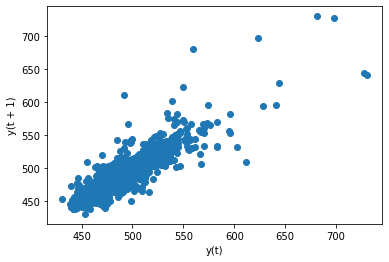

In [ ]:
from pandas.plotting import lag_plot
lag_plot(df['CO2']);


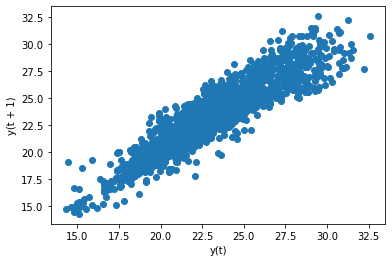

In [ ]:

lag_plot(df['TEMP']);

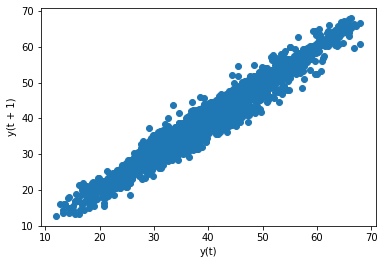

In [ ]:

lag_plot(df['HUM']);

## ## Automate the augmented Dickey-Fuller Test
Since we'll be using it a lot to determine if an incoming time series is stationary, let's write a function that performs the augmented Dickey-Fuller Test.

In [ ]:
from statsmodels.tsa.stattools import adfuller

def adf_test(series,title=''):
    """
    Pass in a time series and an optional title, returns an ADF report
    """
    print(f'Augmented Dickey-Fuller Test: {title}')
    result = adfuller(series.dropna(),autolag='AIC') # .dropna() handles differenced data
    
    labels = ['ADF test statistic','p-value','# lags used','# observations']
    out = pd.Series(result[0:4],index=labels)

    for key,val in result[4].items():
        out[f'critical value ({key})']=val
        
    print(out.to_string())          # .to_string() removes the line "dtype: float64"
    
    if result[1] <= 0.05:
        print("Strong evidence against the null hypothesis")
        print("Reject the null hypothesis")
        print("Data has no unit root and is stationary")
    else:
        print("Weak evidence against the null hypothesis")
        print("Fail to reject the null hypothesis")
        print("Data has a unit root and is non-stationary")

In [ ]:
adf_test(df['CO2'])

Augmented Dickey-Fuller Test: 
ADF test statistic        -4.436250
p-value                    0.000256
# lags used               24.000000
# observations          3324.000000
critical value (1%)       -3.432319
critical value (5%)       -2.862410
critical value (10%)      -2.567233
Strong evidence against the null hypothesis
Reject the null hypothesis
Data has no unit root and is stationary


In [ ]:
adf_test(df['HUM'])

Augmented Dickey-Fuller Test: 
ADF test statistic        -4.056423
p-value                    0.001142
# lags used               26.000000
# observations          3322.000000
critical value (1%)       -3.432320
critical value (5%)       -2.862410
critical value (10%)      -2.567233
Strong evidence against the null hypothesis
Reject the null hypothesis
Data has no unit root and is stationary


In [ ]:
adf_test(df['TEMP'])

Augmented Dickey-Fuller Test: 
ADF test statistic     -6.636372e+00
p-value                 5.549504e-09
# lags used             2.900000e+01
# observations          3.319000e+03
critical value (1%)    -3.432322e+00
critical value (5%)    -2.862411e+00
critical value (10%)   -2.567234e+00
Strong evidence against the null hypothesis
Reject the null hypothesis
Data has no unit root and is stationary


## ACF Plots
Plotting the magnitude of the autocorrelations over the first few (20-40) lags can say a lot about a time series.

A time series is a sequence of measurements of the same variable(s) made over time. Usually, the measurements are made at evenly spaced times — for example, monthly or yearly. The coefficient of correlation between two values in a time series is called the autocorrelation function (ACF). In other words,

>Autocorrelation represents the degree of similarity between a given time series and a lagged version of itself over successive time intervals.

>Autocorrelation measures the relationship between a variable’s current value and its past values.

>An autocorrelation of +1 represents a perfect positive correlation, while an autocorrelation of negative 1 represents a perfect negative correlation.

In [ ]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf

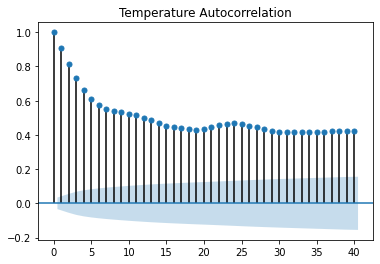

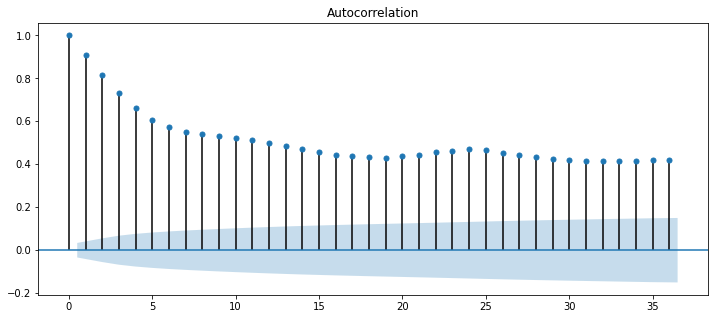

In [ ]:
lags = 40
plot_acf(df['CO2'],title='Temperature Autocorrelation',lags=lags); #non stationary data
fig, ax = plt.subplots(figsize=(12,5))

plot_acf(df['CO2'],ax=ax);
fig.savefig("co2_au")

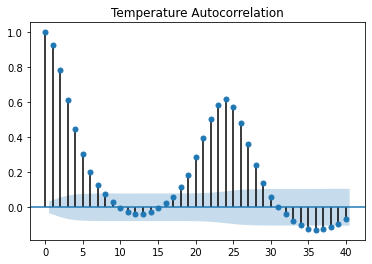

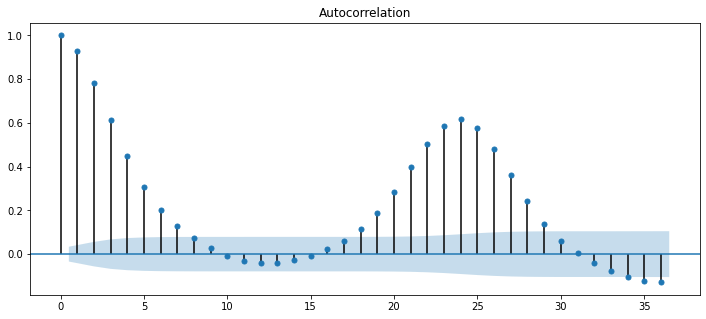

In [ ]:
lags = 40
plot_acf(df['TEMP'],title='Temperature Autocorrelation',lags=lags); #non stationary data
fig, ax = plt.subplots(figsize=(12,5))

plot_acf(df['TEMP'],ax=ax);
fig.savefig("temp_au")

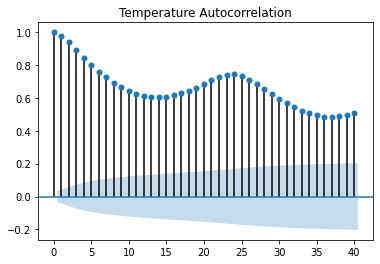

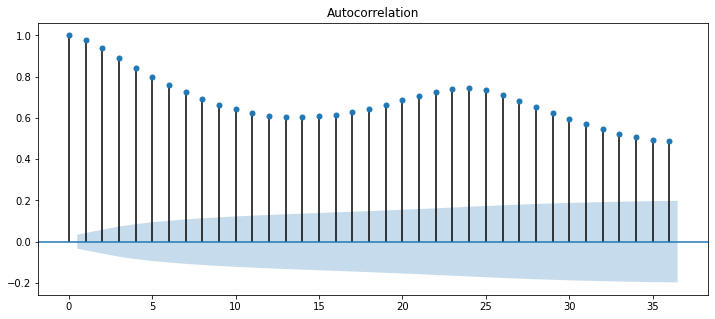

In [ ]:
lags = 40
plot_acf(df['HUM'],title='Temperature Autocorrelation',lags=lags); #non stationary data
fig, ax = plt.subplots(figsize=(12,5))

plot_acf(df['HUM'],ax=ax);
fig.savefig("hum_au")

## PACF Plots
Partial autocorrelations work best with stationary data.

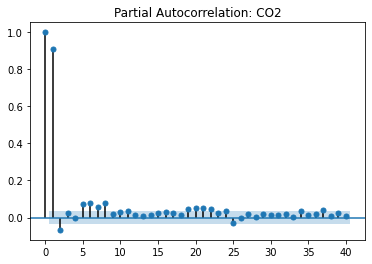

In [ ]:
title='Partial Autocorrelation: CO2'
lags=40
plot_pacf(df['CO2'],title=title,lags=lags);

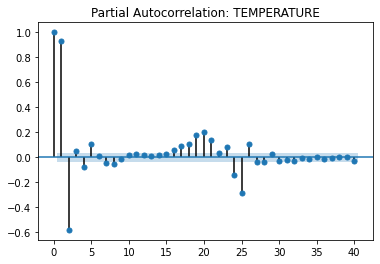

In [ ]:
title='Partial Autocorrelation: TEMPERATURE'
lags=40
plot_pacf(df['TEMP'],title=title,lags=lags);

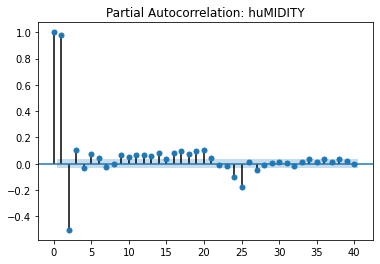

In [ ]:
title='Partial Autocorrelation: huMIDITY'
lags=40
plot_pacf(df['HUM'],title=title,lags=lags);

# Choosing ARIMA Orders

* Goals
  * Understand PDQ terms for ARIMA 
  * Understand how to choose orders manually from ACF and PACF
  * Understand how to use automatic order selection techniques using the functions below
  
Before we can apply an ARIMA forecasting model, we need to review the components of one.<br>
ARIMA, or Autoregressive Independent Moving Average is actually a combination of 3 models:
* <strong>AR(p)</strong> Autoregression - a regression model that utilizes the dependent relationship between a current observation and observations over a previous period.
* <strong>I(d)</strong> Integration - uses differencing of observations (subtracting an observation from an observation at the previous time step) in order to make the time series stationary
* <strong>MA(q)</strong> Moving Average - a model that uses the dependency between an observation and a residual error from a moving average model applied to lagged observations.

<div class="alert alert-info"><h3>Related Functions:</h3>
<tt>
<strong>
<a href='https://www.alkaline-ml.com/pmdarima/user_guide.html#user-guide'>pmdarima.auto_arima</a></strong><font color=black>(y[,start_p,d,start_q, …])</font>&nbsp;&nbsp;&nbsp;Returns the optimal order for an ARIMA model<br>

<h3>Optional Function (see note below):</h3>
<strong>
<a href='https://www.statsmodels.org/stable/generated/statsmodels.tsa.stattools.arma_order_select_ic.html'>stattools.arma_order_select_ic</a></strong><font color=black>(y[, max_ar, …])</font>&nbsp;&nbsp;Returns information criteria for many ARMA models<br><strong>
<a href='https://www.statsmodels.org/stable/generated/statsmodels.tsa.x13.x13_arima_select_order.html'>x13.x13_arima_select_order</a></strong><font color=black>(endog[, …])</font>&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;Perform automatic seasonal ARIMA order identification using x12/x13 ARIMA</tt></div>

In [ ]:
!pip install pmdarima
from pmdarima import auto_arima

# Ignore harmless warnings
import warnings
warnings.filterwarnings("ignore")

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 1.8 MB 5.4 MB/s 
     |████████████████████████████████| 9.8 MB 47.1 MB/s 
  Attempting uninstall: statsmodels
    Found existing installation: statsmodels 0.12.2
    Uninstalling statsmodels-0.12.2:
      Successfully uninstalled statsmodels-0.12.2


In [ ]:
auto_arima(df['CO2'],error_action='ignore').summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                 3349
Model:               SARIMAX(2, 1, 2)   Log Likelihood              -12440.955
Date:                Mon, 17 Oct 2022   AIC                          24891.910
Time:                        13:15:33   BIC                          24922.491
Sample:                    04-12-2022   HQIC                         24902.849
                         - 08-29-2022                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          1.2466      0.091     13.703      0.000       1.068       1.425
ar.L2         -0.3839      0.079     -4.885      0.000      -0.538      -0.230
ma.L1         -1.3122      0.093    -14.111      0.000      -1.494      -1.130
ma.L2          0.3249      0.092      3.523      0.000       0.144       0.506
sigma2        98.8471      0.681    145.248      0.000      97.513     100.181
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):             85997.89
Prob(Q):                              0.98   Prob(JB):                         0.00
Heteroskedasticity (H):               0.74   Skew:                             1.79
Prob(H) (two-sided):                  0.00   Kurtosis:                        27.57
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [ ]:
auto_arima(df['TEMP'],error_action='ignore').summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                 3349
Model:               SARIMAX(5, 1, 1)   Log Likelihood               -3794.647
Date:                Mon, 17 Oct 2022   AIC                           7603.294
Time:                        13:16:57   BIC                           7646.106
Sample:                    04-12-2022   HQIC                          7618.607
                         - 08-29-2022                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          1.5024      0.013    112.603      0.000       1.476       1.529
ar.L2         -0.7352      0.024    -30.947      0.000      -0.782      -0.689
ar.L3          0.2587      0.029      9.042      0.000       0.203       0.315
ar.L4         -0.2471      0.028     -8.720      0.000      -0.303      -0.192
ar.L5          0.0949      0.017      5.498      0.000       0.061       0.129
ma.L1         -0.9888      0.003   -307.400      0.000      -0.995      -0.982
sigma2         0.5645      0.009     59.507      0.000       0.546       0.583
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):              1414.66
Prob(Q):                              0.98   Prob(JB):                         0.00
Heteroskedasticity (H):               0.55   Skew:                             0.42
Prob(H) (two-sided):                  0.00   Kurtosis:                         6.07
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [ ]:
auto_arima(df['HUM'],error_action='ignore').summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                 3349
Model:               SARIMAX(1, 1, 1)   Log Likelihood               -6644.958
Date:                Mon, 17 Oct 2022   AIC                          13295.915
Time:                        13:18:09   BIC                          13314.263
Sample:                    04-12-2022   HQIC                         13302.478
                         - 08-29-2022                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.2898      0.026     11.077      0.000       0.239       0.341
ma.L1          0.3014      0.026     11.701      0.000       0.251       0.352
sigma2         3.1004      0.051     61.274      0.000       3.001       3.200
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):               939.10
Prob(Q):                              0.97   Prob(JB):                         0.00
Heteroskedasticity (H):               1.54   Skew:                            -0.26
Prob(H) (two-sided):                  0.00   Kurtosis:                         5.54
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

# ARMA(p,q) and ARIMA(p,d,q)
# Autoregressive Moving Averages
This section covers <em>Autoregressive Moving Averages</em> (ARMA) and <em>Autoregressive Integrated Moving Averages</em> (ARIMA).

Recall that an <strong>AR(1)</strong> model follows the formula

&nbsp;&nbsp;&nbsp;&nbsp;$y_{t} = c + \phi_{1}y_{t-1} + \varepsilon_{t}$

while an <strong>MA(1)</strong> model follows the formula

&nbsp;&nbsp;&nbsp;&nbsp;$y_{t} = \mu + \theta_{1}\varepsilon_{t-1} + \varepsilon_{t}$

where $c$ is a constant, $\mu$ is the expectation of $y_{t}$ (often assumed to be zero), $\phi_1$ (phi-sub-one) is the AR lag coefficient, $\theta_1$ (theta-sub-one) is the MA lag coefficient, and $\varepsilon$ (epsilon) is white noise.

An <strong>ARMA(1,1)</strong> model therefore follows

&nbsp;&nbsp;&nbsp;&nbsp;$y_{t} = c + \phi_{1}y_{t-1} + \theta_{1}\varepsilon_{t-1} + \varepsilon_{t}$

ARMA models can be used on stationary datasets.

For non-stationary datasets with a trend component, ARIMA models apply a differencing coefficient as well.




In [ ]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

model_arima_co2 = SARIMAX(train_data['CO2'],order=(2,1,2))
results_arima_co2 = model_arima_co2.fit()
results_arima_co2.summary()





/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                    CO2   No. Observations:                 3100
Model:               SARIMAX(2, 1, 2)   Log Likelihood              -11304.290
Date:                Thu, 20 Oct 2022   AIC                          22618.579
Time:                        13:32:19   BIC                          22648.774
Sample:                    04-12-2022   HQIC                         22629.422
                         - 08-19-2022                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          1.2998      0.213      6.092      0.000       0.882       1.718
ar.L2         -0.4072      0.179     -2.280      0.023      -0.757      -0.057
ma.L1         -1.4153      0.215     -6.585      0.000      -1.837      -0.994
ma.L2          0.4246      0.212      2.000      0.046       0.008       0.841
sigma2        86.2462      0.695    124.022      0.000      84.883      87.609
===================================================================================
Ljung-Box (L1) (Q):                   0.03   Jarque-Bera (JB):             46263.66
Prob(Q):                              0.86   Prob(JB):                         0.00
Heteroskedasticity (H):               0.31   Skew:                             1.34
Prob(H) (two-sided):                  0.00   Kurtosis:                        21.74
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [ ]:
model_arima_temp = SARIMAX(train_data['TEMP'],order=(5,1,1))
results_arima_temp = model_arima_temp.fit()
results_arima_temp.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                   TEMP   No. Observations:                 3100
Model:               SARIMAX(5, 1, 1)   Log Likelihood               -3533.142
Date:                Mon, 17 Oct 2022   AIC                           7080.285
Time:                        13:19:02   BIC                           7122.556
Sample:                    04-12-2022   HQIC                          7095.465
                         - 08-19-2022                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          1.5063      0.014    109.598      0.000       1.479       1.533
ar.L2         -0.7364      0.024    -30.059      0.000      -0.784      -0.688
ar.L3          0.2568      0.030      8.678      0.000       0.199       0.315
ar.L4         -0.2485      0.030     -8.408      0.000      -0.306      -0.191
ar.L5          0.0962      0.018      5.407      0.000       0.061       0.131
ma.L1         -0.9896      0.003   -315.105      0.000      -0.996      -0.983
sigma2         0.5720      0.010     57.146      0.000       0.552       0.592
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):              1243.27
Prob(Q):                              1.00   Prob(JB):                         0.00
Heteroskedasticity (H):               0.53   Skew:                             0.45
Prob(H) (two-sided):                  0.00   Kurtosis:                         5.97
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [ ]:
model_arima_hum = SARIMAX(train_data['HUM'],order=(1,1,1))
results_arima_hum = model_arima_hum.fit()
results_arima_hum.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                    HUM   No. Observations:                 3100
Model:               SARIMAX(1, 1, 1)   Log Likelihood               -6120.048
Date:                Mon, 17 Oct 2022   AIC                          12246.097
Time:                        13:19:08   BIC                          12264.213
Sample:                    04-12-2022   HQIC                         12252.603
                         - 08-19-2022                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.2922      0.027     10.738      0.000       0.239       0.345
ma.L1          0.3032      0.027     11.439      0.000       0.251       0.355
sigma2         3.0395      0.051     59.701      0.000       2.940       3.139
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):               943.87
Prob(Q):                              0.98   Prob(JB):                         0.00
Heteroskedasticity (H):               1.48   Skew:                            -0.29
Prob(H) (two-sided):                  0.00   Kurtosis:                         5.64
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

Passing <tt>dynamic=False</tt> means that forecasts at each point are generated using the full history up to that point (all lagged values).

Passing <tt>typ='levels'</tt> predicts the levels of the original endogenous variables. If we'd used the default <tt>typ='linear'</tt> we would have seen linear predictions in terms of the differenced endogenous variables.

For more information on these arguments visit https://www.statsmodels.org/stable/generated/statsmodels.tsa.arima_model.ARIMAResults.predict.html

In [ ]:
# Obtain predicted values
start=len(train_data)
end=len(train_data)+len(test_data)-1
predictions_co2 = results_arima_co2.predict(start=start, end=end, dynamic=False, typ='levels')
print(predictions_co2)

2022-08-19 15:00:00    545.018792
2022-08-19 16:00:00    539.575197
2022-08-19 17:00:00    534.949733
2022-08-19 18:00:00    531.154200
2022-08-19 19:00:00    528.104262
                          ...    
2022-08-23 14:00:00    517.146822
2022-08-23 15:00:00    517.146822
2022-08-23 16:00:00    517.146822
2022-08-23 17:00:00    517.146822
2022-08-23 18:00:00    517.146822
Freq: H, Name: predicted_mean, Length: 100, dtype: float64


In [ ]:

predictions_temp = results_arima_temp.predict(start=start, end=end, dynamic=False, typ='levels')

In [ ]:

predictions_hum = results_arima_hum.predict(start=start, end=end, dynamic=False, typ='levels')

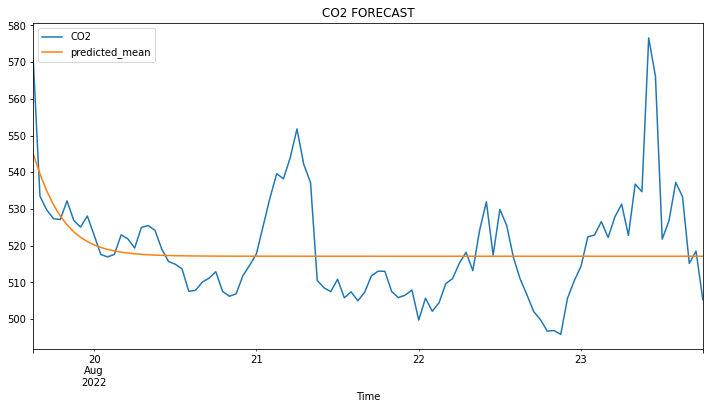

In [ ]:
# Plot predictions against known values
title = 'CO2 FORECAST'
xlabel='' # we don't really need a label here

ax = test_data['CO2'].plot(legend=True,figsize=(12,6),title=title)
predictions_co2.plot(legend=True)
ax.autoscale(axis='x',tight=True)


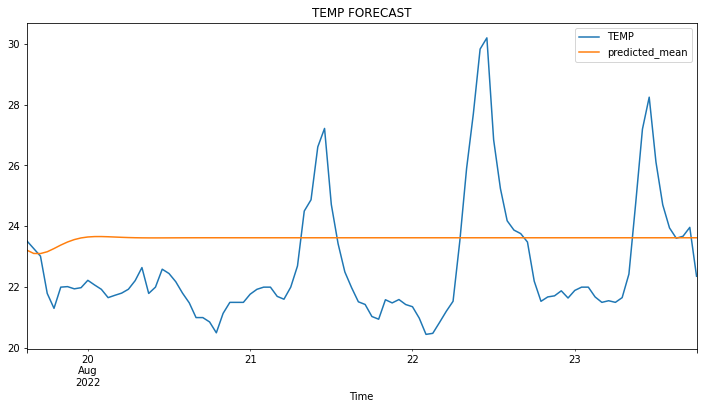

In [ ]:
# Plot predictions against known values
title = 'TEMP FORECAST'
xlabel='' # we don't really need a label here

ax = test_data['TEMP'].plot(legend=True,figsize=(12,6),title=title)
predictions_temp.plot(legend=True)
ax.autoscale(axis='x',tight=True)

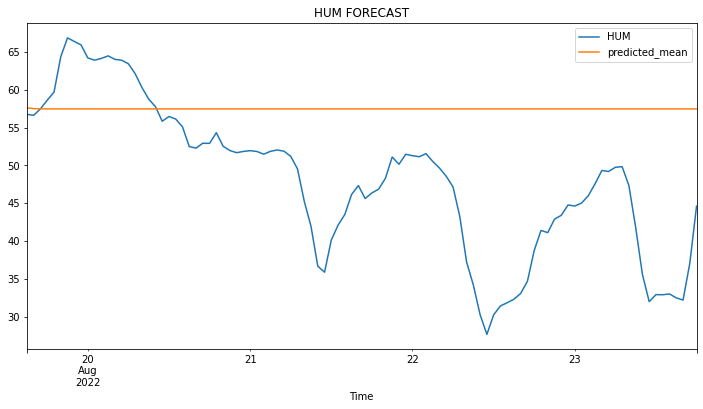

In [ ]:
# Plot predictions against known values
title = 'HUM FORECAST'
xlabel='' # we don't really need a label here

ax = test_data['HUM'].plot(legend=True,figsize=(12,6),title=title)
predictions_hum.plot(legend=True)
ax.autoscale(axis='x',tight=True)

# SARIMA(p,d,q)(P,D,Q)m
# Seasonal Autoregressive Integrated Moving Averages
We have finally reached one of the most fascinating aspects of time series analysis: seasonality.

Where ARIMA accepts the parameters $(p,d,q)$, SARIMA accepts an <em>additional</em> set of parameters $(P,D,Q)m$ that specifically describe the seasonal components of the model. Here $P$, $D$ and $Q$ represent the seasonal regression, differencing and moving average coefficients, and $m$ represents the number of data points (rows) in each seasonal cycle.

<strong>NOTE:</strong> The statsmodels implementation of SARIMA is called SARIMAX. The “X” added to the name means that the function also supports <em>exogenous</em> regressor variables. We'll cover these in the next section.


<div class="alert alert-info"><h3>Related Functions:</h3>
<tt><strong>
<a href='https://www.statsmodels.org/stable/generated/statsmodels.tsa.statespace.sarimax.SARIMAX.html'>sarimax.SARIMAX</a></strong><font color=black>(endog[, exog, order, …])</font>&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;<br>
<strong><a href='https://www.statsmodels.org/stable/generated/statsmodels.tsa.vector_ar.var_model.VARResults.html'>sarimax.SARIMAXResults</a></strong><font color=black>(model, params, …[, …])</font>&nbsp;&nbsp;Class to hold results from fitting a SARIMAX model.</tt>

<h3>For Further Reading:</h3>
<strong>
<a href='https://www.statsmodels.org/stable/statespace.html'>Statsmodels Tutorial:</a></strong>&nbsp;&nbsp;<font color=black>Time Series Analysis by State Space Methods</font></div>

In [ ]:
%pip install pmdarima
# Ignore harmless warnings
import warnings
warnings.filterwarnings("ignore")



Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from pmdarima import auto_arima

In [ ]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

model_sarimax_co2 = SARIMAX(train_data['CO2'],order=(4,1,2),seasonal_order=(4,1,2,24))
results_sarimax_co2 = model_sarimax_co2.fit()
results_sarimax_co2.summary()


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                                CO2   No. Observations:                 3094
Model:             SARIMAX(4, 1, 2)x(4, 1, 2, 24)   Log Likelihood              -11144.464
Date:                            Fri, 21 Oct 2022   AIC                          22314.928
Time:                                    15:23:38   BIC                          22393.306
Sample:                                04-12-2022   HQIC                         22343.088
                                     - 08-19-2022                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.0276      5.904      0.005      0.996     -11.543      11.598
ar.L2          0.6911      5.086      0.136      0.892      -9.278      10.660
ar.L3         -0.0282      0.157     -0.180      0.858      -0.336       0.280
ar.L4         -0.0034      0.040     -0.085      0.932      -0.081       0.074
ma.L1         -0.1522      5.903     -0.026      0.979     -11.723      11.418
ma.L2         -0.8226      5.822     -0.141      0.888     -12.233      10.588
ar.S.L24      -0.6306      0.133     -4.744      0.000      -0.891      -0.370
ar.S.L48       0.0019      0.022      0.089      0.929      -0.041       0.045
ar.S.L72      -0.0198      0.021     -0.941      0.347      -0.061       0.021
ar.S.L96      -0.0672      0.016     -4.169      0.000      -0.099      -0.036
ma.S.L24      -0.3404      0.131     -2.600      0.009      -0.597      -0.084
ma.S.L48      -0.6064      0.128     -4.734      0.000      -0.857      -0.355
sigma2        81.7226      0.901     90.673      0.000      79.956      83.489
===================================================================================
Ljung-Box (L1) (Q):                   0.09   Jarque-Bera (JB):             35653.16
Prob(Q):                              0.76   Prob(JB):                         0.00
Heteroskedasticity (H):               0.33   Skew:                             1.14
Prob(H) (two-sided):                  0.00   Kurtosis:                        19.54
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [ ]:
# Obtain predicted values
start=len(train_data)
end=len(train_data)+len(test_data)-1
predictions_co2_sarimax = results_sarimax_co2.predict(start=start, end=end, dynamic=False, typ='levels')
print(predictions_co2_sarimax)

2022-08-19 15:00:00    544.017307
2022-08-19 16:00:00    534.976305
2022-08-19 17:00:00    528.485561
2022-08-19 18:00:00    526.687047
2022-08-19 19:00:00    523.760762
                          ...    
2022-08-23 10:00:00    522.687939
2022-08-23 11:00:00    523.040853
2022-08-23 12:00:00    520.154573
2022-08-23 13:00:00    522.307317
2022-08-23 14:00:00    519.522719
Freq: H, Name: predicted_mean, Length: 96, dtype: float64


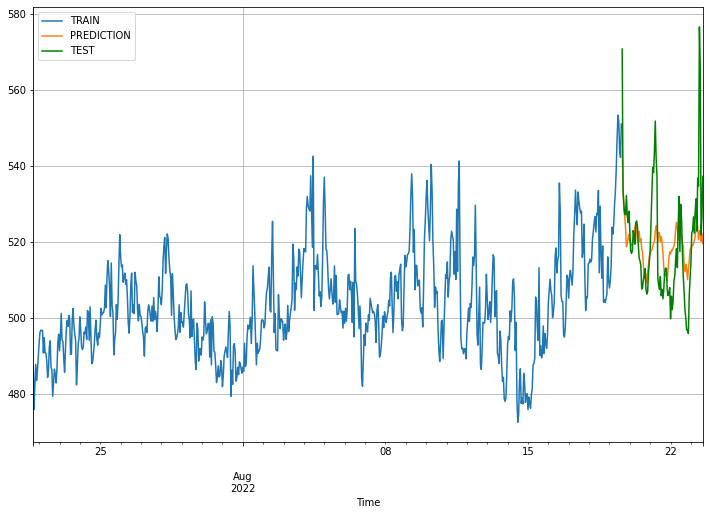

In [ ]:
train_data['CO2'].iloc[2400:].plot(legend=True,label='TRAIN')
predictions_co2_sarimax.plot(legend=True,label='PREDICTION')
test_data['CO2'].plot(legend=True,label='TEST',figsize=(12,8),c='green')
plt.grid()

In [ ]:
mea_stats(test_data['CO2'],predictions_co2_sarimax)

 MSE Error: 149.2354513
 RMSE Error: 12.21619627
Root Mean Squared Percentage Error:0.2265344689
 maximum absolute error: 53.93275065
 mean absolute Error: 8.821616197


In [ ]:
model_sarimax_temp = SARIMAX(train_data['TEMP'],order=(2,1,2),seasonal_order=(2,1,2,24))
results_sarimax_temp = model_sarimax_temp.fit()
results_sarimax_temp.summary()

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                               TEMP   No. Observations:                 3094
Model:             SARIMAX(2, 1, 2)x(2, 1, 2, 24)   Log Likelihood               -2939.037
Date:                            Thu, 20 Oct 2022   AIC                           5896.074
Time:                                    17:56:59   BIC                           5950.336
Sample:                                04-12-2022   HQIC                          5915.570
                                     - 08-19-2022                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          1.1662      0.030     39.145      0.000       1.108       1.225
ar.L2         -0.2991      0.030    -10.132      0.000      -0.357      -0.241
ma.L1         -0.7838      0.032    -24.860      0.000      -0.846      -0.722
ma.L2         -0.2021      0.032     -6.374      0.000      -0.264      -0.140
ar.S.L24      -0.6985      0.267     -2.618      0.009      -1.221      -0.176
ar.S.L48       0.0816      0.021      3.901      0.000       0.041       0.123
ma.S.L24      -0.1224      0.267     -0.458      0.647      -0.646       0.401
ma.S.L48      -0.7124      0.240     -2.963      0.003      -1.184      -0.241
sigma2         0.3923      0.007     57.085      0.000       0.379       0.406
===================================================================================
Ljung-Box (L1) (Q):                   0.03   Jarque-Bera (JB):               769.27
Prob(Q):                              0.86   Prob(JB):                         0.00
Heteroskedasticity (H):               0.51   Skew:                             0.03
Prob(H) (two-sided):                  0.00   Kurtosis:                         5.45
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [ ]:
# Obtain predicted values
start=len(train_data)
end=len(train_data)+len(test_data)-1
predictions_temp_sarimax = results_sarimax_temp.predict(start=start, end=end, dynamic=False, typ='levels')
print(predictions_temp_sarimax)

2022-08-19 15:00:00    23.387888
2022-08-19 16:00:00    23.238329
2022-08-19 17:00:00    23.183836
2022-08-19 18:00:00    22.592737
2022-08-19 19:00:00    22.174155
                         ...    
2022-08-23 10:00:00    27.265406
2022-08-23 11:00:00    27.714492
2022-08-23 12:00:00    26.140967
2022-08-23 13:00:00    25.276131
2022-08-23 14:00:00    24.606796
Freq: H, Name: predicted_mean, Length: 96, dtype: float64


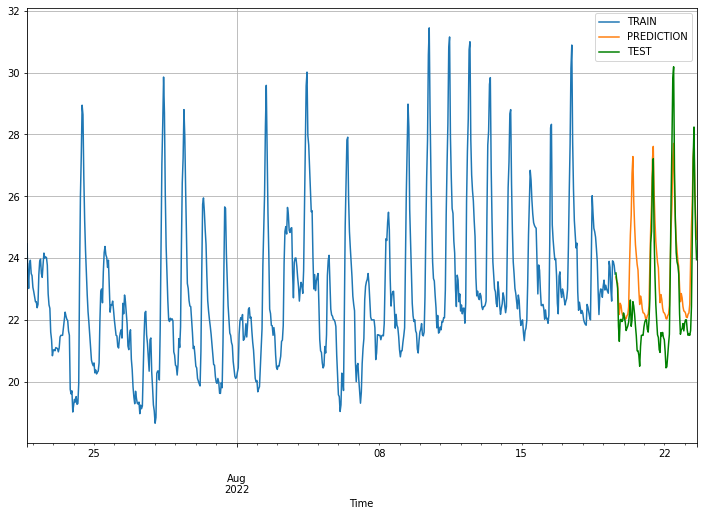

In [ ]:
train_data['TEMP'].iloc[2400:].plot(legend=True,label='TRAIN')
predictions_temp_sarimax.plot(legend=True,label='PREDICTION')
test_data['TEMP'].plot(legend=True,label='TEST',figsize=(12,8),c='green')
plt.grid()
plt.savefig("temp_sari.png")

In [ ]:
mea_stats(test_data['TEMP'],predictions_temp_sarimax)

 MSE Error: 2.270638315
 RMSE Error: 1.506863735
Root Mean Squared Percentage Error:0.6766353884
 maximum absolute error: 4.737107602
 mean absolute Error: 1.120628705


In [ ]:
from statsmodels.tsa.statespace.sarimax import SARIMAX
model_sarimax_hum = SARIMAX(train_data['HUM'],order=(2,0,0),seasonal_order=(2,0,0,24))
results_sarimax_hum = model_sarimax_hum.fit()
results_sarimax_hum.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                                HUM   No. Observations:                 3094
Model:             SARIMAX(2, 0, 0)x(2, 0, 0, 24)   Log Likelihood               -6011.374
Date:                            Thu, 20 Oct 2022   AIC                          12032.747
Time:                                    17:47:10   BIC                          12062.933
Sample:                                04-12-2022   HQIC                         12043.588
                                     - 08-19-2022                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          1.4380      0.014    106.430      0.000       1.412       1.465
ar.L2         -0.4420      0.014    -32.666      0.000      -0.469      -0.416
ar.S.L24       0.2097      0.014     14.821      0.000       0.182       0.237
ar.S.L48       0.1743      0.015     11.388      0.000       0.144       0.204
sigma2         2.8432      0.050     57.067      0.000       2.746       2.941
===================================================================================
Ljung-Box (L1) (Q):                  14.84   Jarque-Bera (JB):               771.39
Prob(Q):                              0.00   Prob(JB):                         0.00
Heteroskedasticity (H):               1.51   Skew:                            -0.19
Prob(H) (two-sided):                  0.00   Kurtosis:                         5.42
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [ ]:
# Obtain predicted values
start=len(train_data)
end=len(train_data)+len(test_data)-1
predictions_hum_sarimax = results_sarimax_hum.predict(start=start, end=end, dynamic=False, typ='levels')
print(predictions_hum_sarimax)

2022-08-19 15:00:00    58.125996
2022-08-19 16:00:00    58.647275
2022-08-19 17:00:00    58.379185
2022-08-19 18:00:00    58.548398
2022-08-19 19:00:00    58.628469
                         ...    
2022-08-23 10:00:00    37.387227
2022-08-23 11:00:00    37.043964
2022-08-23 12:00:00    36.898042
2022-08-23 13:00:00    36.771720
2022-08-23 14:00:00    36.529947
Freq: H, Name: predicted_mean, Length: 96, dtype: float64


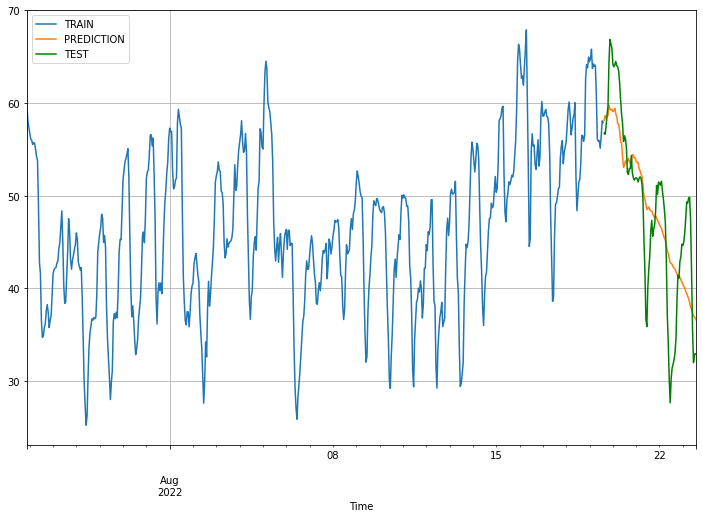

In [ ]:
train_data['HUM'].iloc[2500:].plot(legend=True,label='TRAIN')
predictions_hum_sarimax.plot(legend=True,label='PREDICTION')
test_data['HUM'].plot(legend=True,label='TEST',figsize=(12,8),c='green')
plt.grid()
plt.savefig("hum_sari.png")